In [1]:
#import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Feed the data
x1 = np.float16(np.array([0, 1, 0, 1])) #Values of Input x1
x2 = np.float16(np.array([0, 0, 1, 1])) #Values of Input x2
y_d = np.float16(np.array([0, 1, 1, 0])) #Values of desired Output y

In [12]:
#Initialize the parameters
lr = np.float16(0.1)      #Learning rate

w1 = np.float16([0.5, 0.4, 0.9, 1.0]) #Initial weights of the connection between input neurons and hidden neurons [w13, w23, w14, w24]
w2 = np.float16([-1.2, 1.1])          #Initial weights of the connection between hidden neurons and output neuron [w35, w45]
theta = np.float16([0.8, -0.1, 0.3])  #Initial biases of the hidden neurons 3 & 4 and output neuron 5 [theta3, theta4, theta5]

no_of_epochs = 10000               #Number of Epochs
N = no_of_examples = len(x1)      #Number of data points

In [4]:
#Define sigmoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [5]:
#Define variables to store intermediate values
error = []        #To accumulate error
#accuracy = []     #To accumulate accuracy

dw1 = np.float16([0, 0, 0, 0])    #To store the incremental change in weights [w13, w23, w14, w24]
dw2 = np.float16([0, 0])          #To store the incremental change in weights [w35, w45]
dt = np.float16([0, 0, 0])          #To store the incremental change in biases [theta3, theta4, theta5]

w13 = []      #To accumulate the weights w13
w14 = []      #To accumulate the weights w14
w23 = []      #To accumulate the weights w23
w24 = []      #To accumulate the weights w24
w35 = []      #To accumulate the weights w35
w45 = []      #To accumulate the weights w45

t3 = []       #To accumulate the bias theta3
t4 = []       #To accumulate the bias theta4
t5 = []       #To accumulate the bias theta5

In [13]:
for itr in range(no_of_epochs):
  for i in range(N):
    # Feedforward propagation
    # on hidden layer
    x3 = np.dot(x1[i], w1[0]) + np.dot(x2[i], w1[1]) - np.dot(-1,theta[0])  #computes net input to neuron 3 (x1*w13 + x2*w23 - theta3)
    y3 = np.float16(sigmoid(x3))                                           #computes output of neuron 3

    x4 = np.dot(x1[i], w1[2])+ np.dot(x2[i], w1[3]) - np.dot(-1,theta[1])  #computes net input to neuron 4 (x1*w14 + x2*w24 - theta4)
    y4 = np.float16(sigmoid(x4))                                           #computes output of neuron 4

    # on output layer
    x5 = np.dot(y3,w2[0]) + np.dot(y4,w2[1]) - np.dot(-1,theta[2])         #computes net input to neuron 5 (y3*w35 + y4*w45 - theta5)
    y5 = np.float16(sigmoid(x5))                                           #computes output of neuron 5

    # Calculating error
    #err = np.float16((y5 - y_d[i]))
    err = np.float16((y_d[i]-y5))                       #computes error of the output neuron 5
    error.append(err)

    # Backpropagation
    err_grad_5 = np.float16((y5)*(1-y5)*err)            #compute error gradient to propagate from neuron 5 (y5*(1-y5)*e)
    dw2[0] = lr * y3 * err_grad_5                       #compute weight update w35
    dw2[1] = lr * y4 * err_grad_5                       #compute weight update w45
    dt[2] = lr * (-1) * err_grad_5                      #compute bias update theta5

    err_grad_3 = (y3) * (1-y3) * err_grad_5 * w2[0]     #compute error gradient to propagate from neuron 3 (y3*(1-y3)*e5*w35)
    err_grad_4 = (y4) * (1-y4) * err_grad_5 * w2[1]     #compute error gradient to propagate from neuron 4 (y4*(1-y4)*e5*w45)

    dw1[0] = lr * x1[i] * err_grad_3                    #compute weight update w13
    dw1[1] = lr * x2[i] * err_grad_3                    #compute weight update w23
    dt[0] = lr * (-1) * err_grad_3                      #compute bias update theta3

    dw1[2] = lr * x1[i] * err_grad_4                    #compute weight update w14
    dw1[3] = lr * x2[i] * err_grad_4                    #compute weight update w24
    dt[1] = lr * (-1) * err_grad_4                      #compute bias update theta4

    # Weight updates
    w1[0] = w1[0] + dw1[0]  #w13
    w1[1] = w1[1] + dw1[1]  #w23
    w1[2] = w1[2] + dw1[2]  #w14
    w1[3] = w1[3] + dw1[3]  #w24

    w2[0] = w2[0] + dw2[0]  #w35
    w2[1] = w2[1] + dw2[1]  #w45

    # Bias updates
    theta[0] = theta[0] + dt[0] #theta3
    theta[1] = theta[1] + dt[1] #theta4
    theta[2] = theta[2] + dt[2] #theta5

    # Accumulate all the weights
    w13.append(w1[0])
    w14.append(w1[2])
    w23.append(w1[1])
    w24.append(w1[3])

    w35.append(w2[0])
    w45.append(w2[1])

    #Accumulate all the biases
    t3.append(theta[0])
    t4.append(theta[1])
    t5.append(theta[2])

In [7]:
print(err)

-0.5474


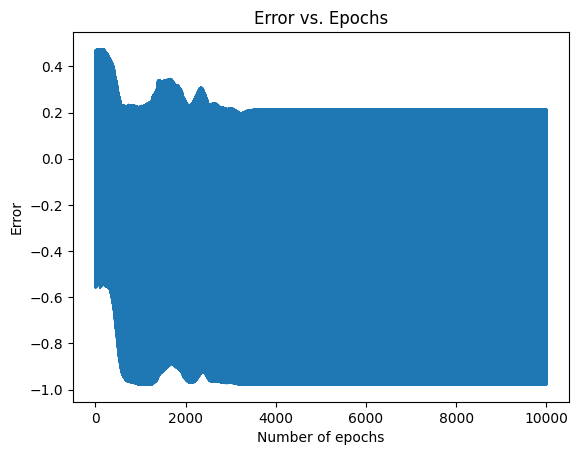

In [14]:
#Visualize error variation with respect to number of epochs
#epochs = np.linspace(1,no_of_epochs,no_of_iterations)
epochs = np.linspace(1,no_of_epochs,len(error))
plt.plot(epochs, error)
plt.title("Error vs. Epochs")
plt.xlabel("Number of epochs")
plt.ylabel("Error")
plt.show()

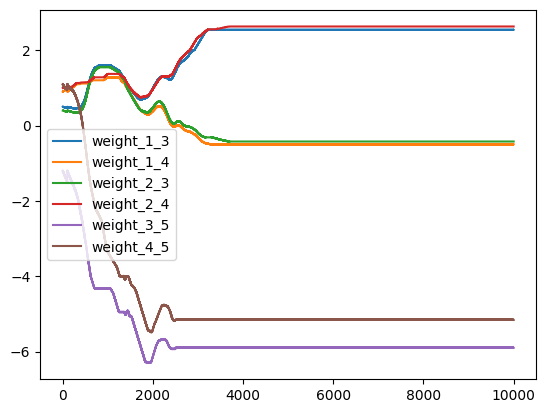

In [15]:
epochs = np.linspace(1,no_of_epochs,len(error))
plt.plot(epochs,w13,label='weight_1_3')
plt.plot(epochs,w14,label='weight_1_4')
plt.plot(epochs,w23,label='weight_2_3')
plt.plot(epochs,w24,label='weight_2_4')
plt.plot(epochs,w35,label='weight_3_5')
plt.plot(epochs,w45,label='weight_4_5')
# Function add a legend
plt.legend()

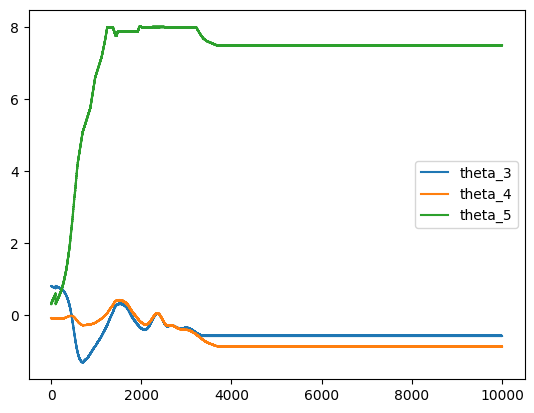

In [16]:
epochs = np.linspace(1,no_of_epochs,len(error))
plt.plot(epochs,t3,label='theta_3')
plt.plot(epochs,t4,label='theta_4')
plt.plot(epochs,t5,label='theta_5')

# Function add a legend
plt.legend()

In [17]:
print("The final weights are: ")
print("weight_1_3: %f" %(w1[0]))
print("weight_2_3: %f" %(w1[1]))
print("weight_1_4: %f" %(w1[2]))
print("weight_2_4: %f" %(w1[3]))
print("weight_3_5: %f" %(w2[0]))
print("weight_4_5: %f" %(w2[1]))

print("\nThe final biases are: ")
print("theta_3: %f" %(theta[0]))
print("theta_4: %f" %(theta[1]))
print("theta_5: %f" %(theta[2]))

The final weights are: 
weight_1_3: 2.542969
weight_2_3: -0.421387
weight_1_4: -0.497070
weight_2_4: 2.632812
weight_3_5: -5.898438
weight_4_5: -5.156250

The final biases are: 
theta_3: -0.590332
theta_4: -0.881348
theta_5: 7.488281
